Sebelum lanjut, untuk pengguna google colab harap lakukan save a copy in drive dulu ya. Di latihan ini kita akan bahas contoh kasus :     

1. Uji beda 2 kelompok berhubungan
2. Uji beda 2 kelompok independent
3. Uji beda lebih dari 2 kelompok

keduanya akan dilakukan secara parametrik dan nonparametrik




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Import all library needed

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

ModuleNotFoundError: No module named 'pandas'

# Uji beda 2 kelompok berhubungan

Diketahui nilai mahasiswa saat belajar a dan b sebagai berikut (dalam skala 10)

a = [10, 9, 7, 8, 7, 8, 9, 9, 8, 7, 7, 7, 8, 8, 9, 8, 8, 8, 8, 8, 9]

b = [8, 8, 7, 7, 6, 7, 7, 7, 7, 6, 6, 6, 6, 7, 8, 7, 8, 7, 8, 7, 8]

In [19]:
#Data
a = np.array([10, 9, 7, 8, 7, 8, 9, 9, 8, 7, 7, 7, 8, 8, 9, 8, 8, 8, 8, 8, 9])
b = np.array([8, 8, 7, 7, 6, 7, 7, 7, 7, 6, 6, 6, 6, 7, 8, 7, 8, 7, 8, 7, 8])

## Uji Normalitas
Ho = data berdistribusi normal

Ha = data tidak berdistribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


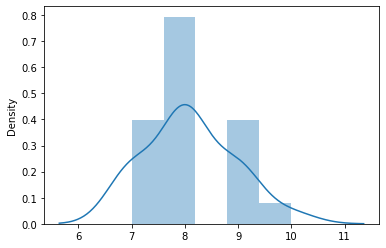

In [20]:
#Dengan histogram
sns.distplot(a)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


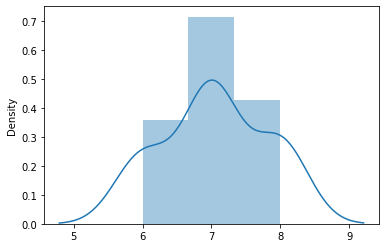

In [21]:
#Dengan histogram
sns.distplot(b)

Berdasarkan histogram, data berbentuk seperti lonceng dengan rata-rata pas di tengah, sehingga bisa kita simpulkan data berdistribusi normal berdasarkan histogram, mari coba dengan uji kolmogorov smirnov

In [22]:
#Uji Kolmogorov-Smirnov
z_score_a = stats.zscore(a)
z_score_b = stats.zscore(b)
print('uji kolmogorov smirnov data a = ', stats.kstest(z_score_a, "norm"))
print('uji kolmogorov smirnov data b = ', stats.kstest(z_score_b, "norm"))

uji kolmogorov smirnov data a =  KstestResult(statistic=0.26103162250727835, pvalue=0.09451762212928216)
uji kolmogorov smirnov data b =  KstestResult(statistic=0.2405721397434657, pvalue=0.14871291095568448)


Karena kedua nilai p-value > 0.05, maka Ho diterima, data berdistribusi normal

## Paired Sample T-Test (Parametrik)

Ho = Tidak ada perbedaan yang signifikan (keduanya sama)

Ha = ada perbedaan yang signifikan (artinya metode pembelajaran offline/online mempengaruhi nilai siswa)

In [24]:
t_value = stats.ttest_rel(a, b)
print('hasil uji t: ', t_value)

hasil uji t:  Ttest_relResult(statistic=8.142565312173659, pvalue=8.863159783400271e-08)


karena p-value = 5.9 x 10^(-7) < 0.05, maka Ho ditolak, terdapat perbedaan yang signifikan dari nilai mahasiswa, metode pembelajaran a/b berpengaruh signifikan terhadap nilai siswa

## Uji Wilcoxon (nonparametrik)

Misalkan datanya tidak berdistribusi normal, uji beda 2 kelompok berhubungan dapat dilakukan dengan uji wilcoxon. Caranya

In [25]:
d = a - b
stats.wilcoxon(d)

WilcoxonResult(statistic=0.0, pvalue=7.897245521335617e-05)

karena p-value = 7.897 x 10^(-5) < 0.05, maka Ho ditolak, terdapat perbedaan yang signifikan dari nilai mahasiswa, metode pembelajaran a/b berpengaruh signifikan terhadap nilai siswa

# Uji Beda 2 kelompok independent

Misalkan seorang CEO kafe ingin mengetahui apakah ada perbedaan yang signifikan antara jumlah pengunjung kafe di wilayah filosofi dan cafe selama 2 minggu terakhir

filosofi = [27, 29, 27, 32, 34, 38, 39, 27, 30, 32, 34, 36, 38, 40]

cafe = [29, 30, 29, 27, 30, 40, 39, 28, 30, 26, 27, 28, 39, 39]

In [27]:
filosofi = np.array([27, 29, 27, 32, 34, 38, 39, 27, 30, 32, 34, 36, 38, 40])
cafe = np.array([28, 30, 29, 35, 34, 37, 39, 28, 30, 32, 33, 35, 39, 39])

## Latihan 1
Coba lihat lagi cara uji normalitas di atas, coba lakukan pada data A dan B

## Uji Normalitas
Ho = data berdistribusi normal

Ha = data tidak berdistribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


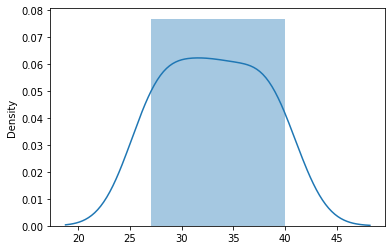

In [28]:
#Cek Normalitas filosofi Dengan histogram
sns.distplot(filosofi)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


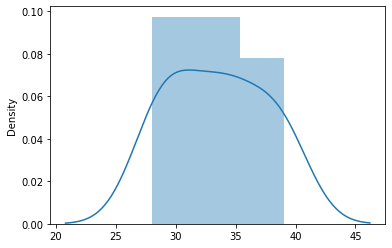

In [29]:
#Cek Normalitas cafe Dengan histogram
sns.distplot(cafe)

In [30]:
#Uji Kolmogorov-Smirnov
z_score_filosofi = stats.zscore(filosofi)
z_score_cafe = stats.zscore(cafe)
print('uji kolmogorov smirnov data filosofi = ', stats.kstest(z_score_filosofi, "norm"))
print('uji kolmogorov smirnov data cafe = ', stats.kstest(z_score_cafe, "norm"))

uji kolmogorov smirnov data filosofi =  KstestResult(statistic=0.15010032999139777, pvalue=0.9106696943287013)
uji kolmogorov smirnov data cafe =  KstestResult(statistic=0.16609147661220497, pvalue=0.8346609194732189)


Apakah keduanya berdistribusi normal? bagaimana kamu mengetahuinya?

## Independent Sample T-Test (Parametrik)
Ho = Tidak ada perbedaan yang signifikan (keduanya sama)

Ha = ada perbedaan yang signifikan (artinya lokasi kafe berpengaruh signifikan terhadap jumlah pengunjung)

In [31]:
t_value = stats.ttest_ind(filosofi, cafe)
print('hasil uji t: ', t_value)

hasil uji t:  Ttest_indResult(statistic=-0.21626215417063352, pvalue=0.8304712072353047)


Nilai p-value = 0.83 > 0.05, artinya Ho diterima, tidak terdapat perbedaan yang signifikan antara jumlah pengunjung kafe wilayah A dan B, berarti lokasi kafe tidak berpengaruh signifikan terhadap jumlah pengunjung

## Uji Mann-Whitney
Misalkan datanya tidak berdistribusi normal, uji beda 2 kelompok independent dapat dilakukan dengan uji Mann-whitney. Caranya

In [32]:
stats.mannwhitneyu(filosofi, cafe)

MannwhitneyuResult(statistic=91.0, pvalue=0.38212917802691737)

## Latihan 2
Tulis kesimpulanmu disini apakah Ho diterima atau ditolak dan apa artinya

Karena p-value <0.05, maka Ho ditolak, tidak berdistribusi normal karena terdapat perbedaan yang signifikan antara jumlah pengunjung kafe wilayah filosofi dan wilayah cafe.

# Uji Beda lebih dari 2 kelompok

Dalam statistik parametrik, nama metodenya adalah ANOVA. ANOVA memiliki 2 asumsi :    
1. Data Berdistribusi Normal
2. Varians data homongen

**Kasus**

Misalkan saat ini kamu adalah menteri pendidikan yang ingin mengetahui apakah kualitas pendidikan di negara ini sudah merata atau belum. Daerah dibagi menjadi kota besar di wilayah berat, kota kecil di barat, ibukota, kota besar di wilayah timur, dan kota kecil di timur. Analisa ini dilakukan berdasarkan nilai ujian akhir SMA

In [33]:
final_exam = pd.read_csv('final_exam.csv')
final_exam

,big_west,small_west,capital_city,big_east,small_east
0,87,77,86,71,70
1,75,83,90,82,76
2,80,73,87,85,81
3,75,82,85,89,85
4,91,71,85,72,75
5,89,87,96,79,75
6,91,77,95,79,75
7,87,84,89,85,72
8,90,86,93,84,72
9,94,93,91,86,75


## Uji Normalitas
Ho = data berdistribusi normal

Ha = data tidak berdistribusi normal

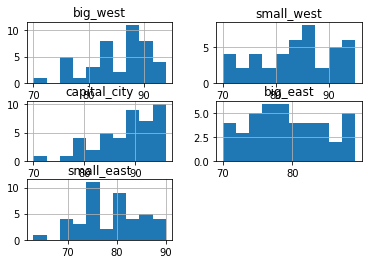

In [34]:
#Membuat histogram dari pandas dan matplotlib

final_exam.hist()
plt.show()

Terlihat beberapa datanya seperti tidak normal, mari kita coba uji Kolmogorov-Smirnov untuk mengeceknya

In [35]:
#Check normality using Kolmogorov-Smirnov Test
area = ['big_west', 'small_west', 'capital_city', 'small_east', 'big_east']
for a in area:
  z_score = stats.zscore(final_exam[a])
  normality = stats.kstest(z_score, 'norm', )
  print('normality for ', a, '=', normality)

normality for  big_west = KstestResult(statistic=0.1463623852887705, pvalue=0.2875537193189711)
normality for  small_west = KstestResult(statistic=0.09305748870693209, pvalue=0.8504695155077621)
normality for  capital_city = KstestResult(statistic=0.1723544820281414, pvalue=0.13793715190373557)
normality for  small_east = KstestResult(statistic=0.11522951440351409, pvalue=0.5926673369890815)
normality for  big_east = KstestResult(statistic=0.09709346617838455, pvalue=0.8123161041508566)


Berdasarkan histogram data area berbentuk sama, sehingga bisa kita simpulkan data berdistribusi normal berdasarkan histogram.

## Uji Homogenitas

Ho = varians semua kelompok cenderung sama (homogen)

Ha = varians semua kelompok cenderung tidak sama (homogen)

In [36]:
#Uji Homogenitas dengan Levene
stats.levene(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city']
             , final_exam['small_east'], final_exam['big_east'])

LeveneResult(statistic=0.5104303607286808, pvalue=0.728125042716542)

Karena p-value > 0.05, maka Ho diterima sehingga asumsi homogenitas dari ANOVA sudah terpenuhi

## Uji ANOVA (parametrik)

Ho = kualitas pendidikan merata (tidak ada perbedaan kualitas pendidikan yang signifikan antar wilayah)

Ha = kualitas pendidikan tidak merata (ada perbedaan kualitas pendidikan yang signifikan antar wilayah)

In [37]:
stats.f_oneway(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city']
             , final_exam['small_east'], final_exam['big_east'])

F_onewayResult(statistic=18.48895253915249, pvalue=4.945434101915241e-13)

Karena p-value < 0.05, maka Ho ditolak, ternyata kualitas pendidikan di negara ini belum merata. Untuk itu, kamu perlu menyelidiki wilayah dengan rata-rata terendah agar kualitas sarana pendidikan dan gurunya bisa ditingkatkan

In [38]:
final_exam.describe()

,big_west,small_west,capital_city,big_east,small_east
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,85.325581,83.837209,88.232558,79.209302,78.627907
std,5.982995,7.006562,6.159921,5.667611,6.302015
min,70.000000,70.000000,70.000000,70.000000,63.000000
25%,82.000000,78.500000,85.000000,75.000000,75.000000
50%,87.000000,84.000000,90.000000,78.000000,80.000000
75%,90.000000,89.500000,93.000000,83.000000,83.000000
max,94.000000,95.000000,96.000000,89.000000,90.000000


Ternyata nilai rata-rata di ibukota jauh diatas wilayah lain, sementara kota kecil di timur mendapat nilai rata-rata terkecil. Sebagai menteri pendidikan berarti kamu harus membuat program untuk membangun sarana pendidikan yang lebih baik dan mengirim guru-guru terbaik ke kota kecil di wilayah timur.

## Uji Kruskal-Wallis (nonparametrik)
Jika datanya ternyata tidak berdistribusi normal atau tidak homogen, kamu bisa menggunakan uji Kruskal Wallis sebagai berikut

In [39]:
stats.kruskal(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city']
             , final_exam['small_east'], final_exam['big_east'])

KruskalResult(statistic=57.244594069662135, pvalue=1.0992920086269013e-11)

## Latihan 4

Coba bikin kesimpulan dari hasil p-value tersebut

karena p-value < 0.05, maka Ho ditolak, ternyata setelah di uji coba Kruskal-Wallis, adanya kekurangan dari asumsi homogenitas.

# Latihan tambahan

Misalkan kamu adalah data scientist di gojek. Kamu ingin mengetahui apakah kemacetan mempengaruhi tingkat kepuasan pelanggan. Jadi kamu ingin memebandingkan nilai "bintang" dari customer saat dia order di jam macet dan tidak macet.
(#hint = data dari customer yang sama)

macet = [2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5]

tidak_macet = [2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4]

1. Buat hipotesisnya
2. Lakukan uji asumsi normalitasnya
3. Jika datanya normal lakukan uji parametrik, jika tidak berdistribusi normal lakukan uji nonparametrik
4. Apa kesimpulan uji hipotesisnya?



1.   Data Hipotesis

Nilai data scientist di gojek pada data dari customer
bernilai sama



In [40]:
#Data
macet = [2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5]
tidak_macet = [2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4]

2. Uji Normalitas

Ho = data berdistribusi normal

Ha = data tidal berdistribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


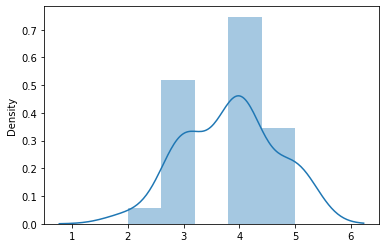

In [41]:
#Cek Normalitas macet Dengan histogram
sns.distplot(macet)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


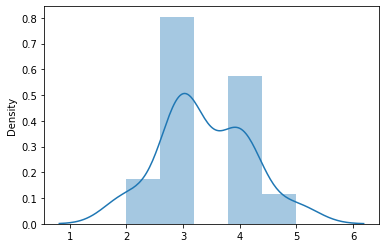

In [42]:
#Cek Normalitas tidak_macet Dengan histogram
sns.distplot(tidak_macet)

In [44]:
#Uji Kolmogorov-Smirnov
z_score_macet = stats.zscore(macet)
z_score_tidak_macet = stats.zscore(tidak_macet)
print('uji kolmogorov smirnov data macet = ', stats.kstest(z_score_macet, "norm"))
print('uji kolmogorov smirnov data tidak_macet = ', stats.kstest(z_score_tidak_macet, "norm"))

uji kolmogorov smirnov data macet =  KstestResult(statistic=0.2414618941043637, pvalue=0.05668593129743599)
uji kolmogorov smirnov data tidak_macet =  KstestResult(statistic=0.2769460572882385, pvalue=0.01855050750663906)


3. Uji Parametriks

Ho = Tidak ada perbedaan yang signifikan (keduanya sama)

Ha = Ada perbedaan yang signifikan (artinya lokasi kafe berpengaruh signifikan terhadap jumlah pengunjung)



In [45]:
t_value = stats.ttest_ind(macet, tidak_macet)
print('hasil uji t: ', t_value)

hasil uji t:  Ttest_indResult(statistic=2.160246899469286, pvalue=0.03504836355503375)


4. Kesimpulan 

Pada nilai data scientist di gojek terlihat sama. maka dari itu data tersebut merupakan distribusi normal dan pada p-value hipotesis ini Ho di tolak karena p-value kurang dari 0.05.